<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team_59/blob/main/Sem_09_CD_Reto_entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Actividad Reto 2:
## Clasificación-ensambles y presentación ejecutiva

### Materia: Ciencia y analítica de datos
**Profesora: María de la Paz Rico Fdz.**

###Alumnos: 
**Andrea Margarita Osorio González** **A01104776**

**Fernando Alfredo Rojas Estrella** **A01685424**


---


**Clasificación**

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

1. Selecciona tus variables independientes X y dependiente Y (semáforo)
2. Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
3. Realiza un análisis general de las features importances a traves de decision trees o random forest.
4. Selecciona las variables de mayor importancia.
5. Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
6. Explora que clasificador es el más optimo, ejemplo:
  - Decision trees
  - Random Forest.
7. Determina el grado de exactitud a través del reporte de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html Links to an external site.
8. Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.
9. Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.



---





---
---
# Inicializando libreta y obteniendo URLs de datos

---

In [1]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Módulos, librerías y paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#import geopandas as gpd
#import pandas_profiling
#from shapely.geometry import Point
#from google.colab import drive
from google.colab.data_table import DataTable
from pandas.core.groupby import groupby

from matplotlib import rcParams
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, make_scorer, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing, tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression

#import copy as cp
#!pip install geopandas

#import warnings
#warnings.filterwarnings("ignore")

# tamaño de la figura en pulgadas
#rcParams["figure.figsize"] = 10, 6
#np.random.seed(42)

#import pydotplus
#from IPython.display import Image



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Obtención de URLs de información

# 2. Aguas subterraneas.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def abrir_archivo_(URL, modo):
  with open(URL, modo, encoding = "ISO-8859-1") as fichero:
      linea = fichero.readline()
      print('\n-----------------------------Abriendo archivo-----------------------------\n')
      while linea != '':
          print(linea, end='')
          linea = fichero.readline()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 2. Aguas subterraneas

URL_2_datos_original= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/-Sb_Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
URL_2_datos_tratados= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Datos tratados/Aguas_subterraneas_datos_tratados.csv'

URL_kmz_2= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz'

df_2= pd.read_csv(URL_2_datos_original, encoding= "ISO-8859-1")
df_2_= pd.read_csv(URL_2_datos_tratados, encoding= 'utf-8', sep= ',')


---
---

# Funciones creadas por el equipo para uso posterior

---

In [4]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Funciones para entendimiento de los datos

# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Limpia los datos eliminando los registros nulos o rellena con la media de la columna
def Busca_Nulos_(data_frame, accion): # Función que ayuda a identificar columnas con valores nulos
  data_frame= data_frame.replace(['SIN DATOS','N/A', 0, ''],np . nan)
  if data_frame.isnull().values.any():          # Buscando nulos
    print('\n------------------Búscando y borrando nulos en data frame-----------------\n')
    print('El data frame SÍ tiene nulos')     # Desechamos los valores NaN
    names_columns= data_frame.columns.values
    for name in names_columns:
      if data_frame[name].isnull().values.any():
        print('Se encuentran\t',data_frame[name].isnull().sum(),'\tnulos en la columna: ',name, 'antes del borrado')
        if accion == 'delete':
          data_frame.dropna(subset=[name], inplace=True)
          print('Se encuentran\t', data_frame[name].isnull().sum(),'\tnulos en la columna: ',name, 'después de borrarlos')
        elif accion == 'mean':
          mean= data_frame[name].mean()
          print('\nVal:',mean)
          for i in range(len(data_frame)):
            if data_frame.iloc[i].empty: data_frame.iloc[i][name]=val
            #print(val)
          print('Se encuentran\t', data_frame[name].isnull().sum(),'\tnulos en la columna: ',name, 'después de imputarlos con la media')
        else:
          None
      else:
        None
  else:
    print('\n------------------------El data frame NO tiene nulos----------------------\n')
  print('\nSe procedió al borrado de nulos en el data set\n¿Se encuentran nulos en el data set?: ',data_frame.isnull().values.any())
  print('\n-----------------------------Fin de la función----------------------------\n')

  return data_frame
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Busca_Nulos (data_frame): # Función que ayuda a identificar columnas con valores nulos
  data_frame = data_frame.replace(['SIN DATOS','N/A', 0, ''],np . nan)
  if data_frame.isnull().values.any():          # Buscando nulos
    print('\n-----------------------Búscando nulos en data frame-----------------------\n')
    print('El data frame SÍ tiene nulos')     # Desechamos los valores NaN
    names_columns= data_frame.columns.values
    for name in names_columns:
      if data_frame[name].isnull().values.any():
        print('Se encuentran\t',data_frame[name].isnull().sum(),'\tnulos en la columna: ',name)
      else:
        None
  else:
    print('\n------------------------El data frame NO tiene nulos----------------------\n')
  print('\n-----------------------------Fin de la función----------------------------\n')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_hist(datos_, bins_, color_, titulo_): # Función que sirve para gráficar columnas del data frame
  if color_== '':
    color_= "green"
  nombres= datos_.columns
  n= len(nombres)
  print('-------------------------------------\n# de gráficos:',n)
  nr= int(n/5)+1
  round(nr,0)
  nc = int(n/nr)
  if nc== 0:
    nc= n
  else:
    if nr*nc<n:
      nc=nc+1
  print('Renglones:',nr,', columnas:',nc)  
  sns.set(rc={'figure.figsize':(nc*5,nr*5)})
  fig, axes = plt.subplots(nr,nc)
  plt.suptitle(titulo_ , y= 0.99, fontsize= 17, fontweight= "bold", 
               fontfamily= "serif", fontname= "Sans")
  k= 1
  for name in nombres:
    plt.subplot(nr,nc,k)  # Los nichos para cada histograma se numeran iniciando en 1.
    plt.hist(datos_[name], bins= bins_, color= color_, density= True)
    #plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    plt.subplots_adjust(top=0.95)
    k= k+1
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_boxplot(datos_, color_, titulo_): # Función que sirve para gráficar columnas del data frame
  if color_== '':
    color_= "green"
  nombres= datos_.columns
  n= len(nombres)
  print('-------------------------------------\n# de gráficos:',n)
  nr= int(n/5)+1
  round(nr,0)
  nc = int(n/nr)
  if nc== 0:
    nc= n
  else:
    if nr*nc<n:
      nc=nc+1
  print('Renglones:',nr,', columnas:',nc)  
  sns.set(rc={'figure.figsize':(nc*5,nr*5)})
  fig, axes = plt.subplots(nr,nc)
  plt.suptitle(titulo_ , y= 0.99, fontsize= 17, fontweight= "bold", 
               fontfamily= "serif", fontname= "Sans")
  k= 1
  for name in nombres:
    plt.subplot(nr,nc,k)  # Los nichos para cada histograma se numeran iniciando en 1.
    plt.boxplot(datos_[name])
    plt.ylabel('Conteos')
    plt.title(name)
    plt.subplots_adjust(top=0.95)
    k= k+1
  plt.show()
  print('-------------------------------------')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_violin(datos_, color_, titulo_): # Función que sirve para gráficar columnas del data frame
  if color_== '':
    color_= "green"
  nombres= datos_.columns
  n= len(nombres)
  print('-------------------------------------\n# de gráficos:',n)
  nr= int(n/5)+1
  round(nr,0)
  nc = int(n/nr)
  if nc== 0:
    nc= n
  else:
    if nr*nc<n:
      nc=nc+1
  print('Renglones:',nr,', columnas:',nc)  
  sns.set(rc={'figure.figsize':(nc*5,nr*5)})
  fig, axes = plt.subplots(nr,nc)
  plt.suptitle(titulo_ , y= 0.99, fontsize= 17, fontweight= "bold", 
               fontfamily= "serif", fontname= "Sans")
  k= 1
  for name in nombres:
    plt.subplot(nr,nc,k)  # Los nichos para cada histograma se numeran iniciando en 1.
    plt.violinplot(datos_[name])
    plt.ylabel('Conteos')
    plt.title(name)
    plt.subplots_adjust(top=0.95)
    k= k+1
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_histA(datos_, bins_): # Función que sirve para gráficar columnas del data frame 
  nombres= datos_.columns
  k= 1
  for name in nombres:
    sns.displot(datos_[name], color='green', bins= bins_, kde=True) #creamos el gráfico en Seaborn
    plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    k= k+1
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_exploratorio(datos_): # Función que gráfica de forma exploratoria el data frame
  sns.pairplot(data = datos_, palette= 'bright')
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_mapa_de_calor(datos_, cmap_, titulo_):
  if cmap_== '':
    cmap_= "crest"
  plt.title(titulo_)
  sns.heatmap(datos_.corr(), annot= True, cmap= cmap_)
  plt.show()
 
 

---
---
# Cargar la bd elegida y con los datos tratados
### Seleccionamos el data set de "Aguas_subterraneas_datos_tratados.csv"

- Seleccionar las variables independientes X y dependiente Y (semáforo)
- Cambiar con la función label encoding el semáforo, ej. ["clase 1", "clase 2", "clase 3"] a [1,2,3]
---


In [5]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Carga de los data frame: "2. Aguas subterraneas - Datos tratados"

#pd.set_option('display.width',25)
#pd.set_option('max_columns',55)
print('\n---------------------Abriendo el Data Frame original----------------------\n')
display('Información ORIGINAL:', df_2.head(2))

print('\n----------------Abriendo el Data Frame con datos tratados-----------------\n')
display('Información CON TRATAMIENTO:', df_2_.head(2))


print('\n--------------Describiendo el Data Frame con datos tratados---------------\n')
display(df_2_.describe())

print('\n--------------Información del Data Frame  con datos tratados---------------\n')
display(df_2_.info())


---------------------Abriendo el Data Frame original----------------------



'Información ORIGINAL:'

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI



----------------Abriendo el Data Frame con datos tratados-----------------



'Información CON TRATAMIENTO:'

,Unnamed: 0,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Conteo
0,0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,...,1,1,1,1,1,1,1,1,1,1
1,1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,...,1,1,1,1,1,1,1,1,1,1



--------------Describiendo el Data Frame con datos tratados---------------



,Unnamed: 0,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Conteo
count,1054.000000,1054.000000,1054.000000,1054.0,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,...,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.0
mean,533.829222,-101.848270,23.161796,2020.0,234.695266,2.889943,1142.726471,2.674573,896.945797,1.829222,...,0.942125,0.924099,0.881404,0.998102,0.985769,0.999051,0.988615,0.919355,0.872865,1.0
std,308.829336,6.697568,3.875005,0.0,111.147849,0.683014,1248.990617,0.854783,2765.757924,0.938397,...,0.233617,0.264966,0.323466,0.043540,0.118500,0.030802,0.106143,0.272419,0.333282,0.0
min,0.000000,-116.664250,14.561150,2020.0,26.640000,1.000000,110.000000,1.000000,101.200000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,266.250000,-105.385170,20.224857,2020.0,164.257500,3.000000,506.000000,2.000000,338.050000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
50%,533.500000,-102.170665,22.640705,2020.0,215.825000,3.000000,820.000000,3.000000,551.400000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,800.750000,-98.971268,25.508770,2020.0,292.930000,3.000000,1328.000000,3.000000,915.600000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,1067.000000,-86.864120,32.677713,2020.0,1650.000000,5.000000,18577.000000,5.000000,82170.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0



--------------Información del Data Frame  con datos tratados---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1054 non-null   int64  
 1   CLAVE                 1054 non-null   object 
 2   SITIO                 1054 non-null   object 
 3   ORGANISMO_DE_CUENCA   1054 non-null   object 
 4   ESTADO                1054 non-null   object 
 5   MUNICIPIO             1054 non-null   object 
 6   ACUIFERO              1054 non-null   object 
 7   SUBTIPO               1054 non-null   object 
 8   LONGITUD              1054 non-null   float64
 9   LATITUD               1054 non-null   float64
 10  PERIODO               1054 non-null   int64  
 11  ALC_mg/L              1054 non-null   float64
 12  CALIDAD_ALC           1054 non-null   int64  
 13  CONDUCT_mS/cm         1054 non-null   float64

None

---

# 1. Selección de variables independientes y dependientes
- Selecciona variables de independientes y dependiente (semáforo)- Adecuar el formato de la variable a través de label encoding.

---

In [6]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Seleccionar las variables independientes X y dependiente Y (semáforo)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Identificando y ordenando la información
# Se enlistan todos los nombres de las variables del data set
nombres_AguSub= ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']
# Se enlistan los nombres de las variables "binarias" del data set
cat_bin_AguSub= ['CUMPLE_CON_ALC', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CF', 'CUMPLE_CON_COND', 'CUMPLE_CON_CR', 'CUMPLE_CON_DUR', 'CUMPLE_CON_FE', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_HG', 'CUMPLE_CON_MN', 'CUMPLE_CON_NO3', 'CUMPLE_CON_PB', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin']
# Se enlistan los nombres de las variables "númericas" del data set
num_AguSub= ['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L', 'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L'] #, 'SDT_mg/L'
# Se enlistan los nombres de las variables "categóricas ordinales" del data set
cat_ord_AguSub= ['CALIDAD_ALC', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_COLI_FEC', 'CALIDAD_CONDUC', 'CALIDAD_CR', 'CALIDAD_DUR', 'CALIDAD_FE', 'CALIDAD_FLUO', 'CALIDAD_HG', 'CALIDAD_MN', 'CALIDAD_N_NO3', 'CALIDAD_PB', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin']
# Se enlistan los nombres de las variables "categóricas nominales" del data set
cat_nom_AguSub= ['ACUIFERO', 'CLAVE', 'CONTAMINANTES', 'ESTADO', 'LATITUD', 'LONGITUD', 'MUNICIPIO', 'ORGANISMO_DE_CUENCA', 'PERIODO', 'SEMAFORO', 'SITIO', 'SUBTIPO']
# Se enlistan los nombres de las variables "georeferencia" del data set
geo_AguSub= ['LATITUD', 'LONGITUD']

print('\n---------------------- Seleccionando variables X, Y ----------------------\n')
# Variables seleccionadas para uso como variables independientes X
nom_var_X= num_AguSub + geo_AguSub
df_2_X= df_2_[nom_var_X].copy()
print('Shape df_2_X', df_2_X.shape)
X= np.array(df_2_X)
y= np.array(df_2_['SEMAFORO'])
print('Shape X:', X.shape, '\n\t Variables:')
for name in nom_var_X:
  print('\t -', name)
print('\n')
print('Shape y:', y.shape, '\n\t Variables:')
print('\t -', 'SEMAFORO')
print('\n--------------------------------------------------------------------------\n')



---------------------- Seleccionando variables X, Y ----------------------

Shape df_2_X (1054, 16)
Shape X: (1054, 16) 
	 Variables:
	 - ALC_mg/L
	 - AS_TOT_mg/L
	 - CD_TOT_mg/L
	 - COLI_FEC_NMP/100_mL
	 - CONDUCT_mS/cm
	 - CR_TOT_mg/L
	 - DUR_mg/L
	 - FE_TOT_mg/L
	 - FLUORUROS_mg/L
	 - HG_TOT_mg/L
	 - MN_TOT_mg/L
	 - N_NO3_mg/L
	 - PB_TOT_mg/L
	 - SDT_M_mg/L
	 - LATITUD
	 - LONGITUD


Shape y: (1054,) 
	 Variables:
	 - SEMAFORO

--------------------------------------------------------------------------



In [7]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Cambiar con la función label encoding el semáforo, ej. ["clase 1", "clase 2", "clase 3"] a [1,2,3]

print('\n------------------------ Aplicando label encoding ------------------------\n')
y_categorias= df_2_['SEMAFORO'].unique()
label_encoder= preprocessing.LabelEncoder()
y_df= pd.DataFrame(df_2_['SEMAFORO'], columns= ['SEMAFORO'])
y_df= y_df.assign(Clase=df_2_['SEMAFORO'])
y_df['Clase']= label_encoder.fit_transform(y_df['Clase'])
y_df= pd.DataFrame(y_df)

print('Categorías y:', y_categorias, '\n\ny:')
print(y_df, '\n')
print('Shape y_df:', y_df.shape, '\n\t Variables:')
print('\t -', y_df.columns)

print('\n--------------------------------------------------------------------------\n')
y_df['Clase']= y_df['Clase'].replace(1, 3)
y_df['Clase']= y_df['Clase'].replace(2, 1)
y_df['Clase']= y_df['Clase'].replace(0, 2)

print(y_df.sample(10))

print('\n--------------------------------------------------------------------------\n')

y= y_df.Clase.copy()
print(y.sample(10))


------------------------ Aplicando label encoding ------------------------

Categorías y: ['Verde' 'Rojo' 'Amarillo'] 

y:
     SEMAFORO  Clase
0       Verde      2
1       Verde      2
2        Rojo      1
3       Verde      2
4        Rojo      1
...       ...    ...
1049     Rojo      1
1050     Rojo      1
1051     Rojo      1
1052    Verde      2
1053    Verde      2

[1054 rows x 2 columns] 

Shape y_df: (1054, 2) 
	 Variables:
	 - Index(['SEMAFORO', 'Clase'], dtype='object')

--------------------------------------------------------------------------

      SEMAFORO  Clase
176       Rojo      3
368       Rojo      3
870       Rojo      3
1050      Rojo      3
892   Amarillo      2
595      Verde      1
290      Verde      1
105       Rojo      3
344   Amarillo      2
649      Verde      1

--------------------------------------------------------------------------

981    1
733    2
683    3
807    1
802    1
789    1
67     2
870    3
122    3
265    3
Name: Clase, dtype: int64


In [8]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Features importances: decision trees o random forest

# Particionando datos= prueba:20%, entrenamiento:80%
print('\n-------------------------- Conjuntos de entrada --------------------------\n')
Xtv, Xtest, ytv, ytest = train_test_split(X, y, train_size=0.80, random_state= 1)
print(f'\tTamaño del conjunto de entrada de entrenamiento-validación: {Xtv.shape}')
print(f'\t\t\t  Tamaño del conjunto de entrada de prueba: {Xtest.shape}')
print(f'\t Tamaño del conjunto de salida de entrenamiento-validación: {ytv.shape}')
print(f'\t\t\t   Tamaño del conjunto de salida de prueba: {ytest.shape}')
print('\n--------------------------------------------------------------------------\n')


-------------------------- Conjuntos de entrada --------------------------

	Tamaño del conjunto de entrada de entrenamiento-validación: (843, 16)
			  Tamaño del conjunto de entrada de prueba: (211, 16)
	 Tamaño del conjunto de salida de entrenamiento-validación: (843,)
			   Tamaño del conjunto de salida de prueba: (211,)

--------------------------------------------------------------------------



In [9]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Clases

Xtv= pd.DataFrame(Xtv)
Xtv.columns= nom_var_X
#display(Xtv)

print('\n------------------------Porcentaje de cada clase -------------------------\n')
print('Distribución de las clases:\n')
print(round(ytv.value_counts(100)*100, 1))
print('\n--------------------------------------------------------------------------\n')

#print('Xtv.columns:', Xtv.columns)


------------------------Porcentaje de cada clase -------------------------

Distribución de las clases:

1    40.0
3    35.9
2    24.1
Name: Clase, dtype: float64

--------------------------------------------------------------------------



---

# 2. Realizar clasificador, con las variables seleccionadas.
- Tomar en consideración si existe un desbalance en las clases y realiza acciones pertinentes (ej. class_weight en clasificador, división de datos con train_test_split).

---


----------------------------- Decision tree ------------------------------


--------------------------------------------------------------------------



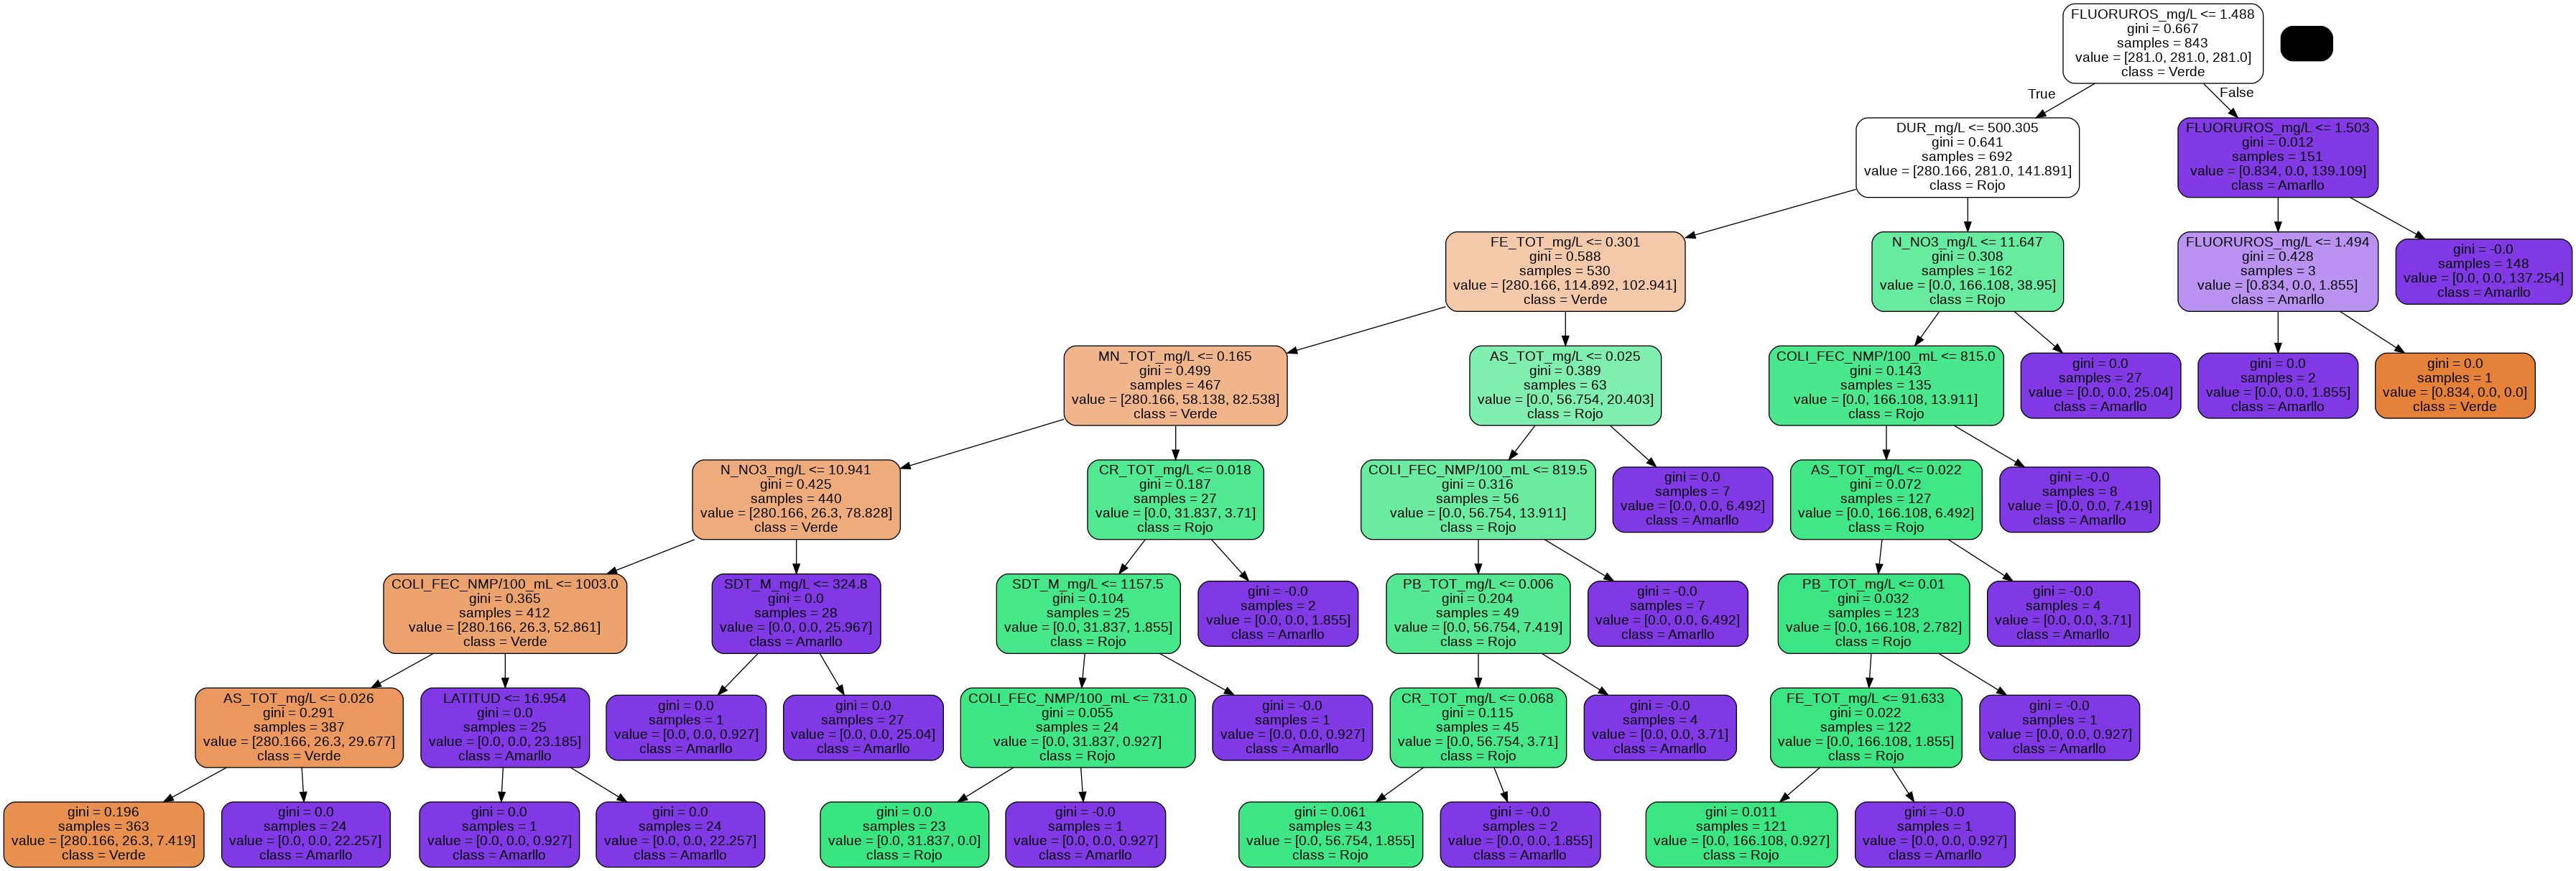

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Realizar clasificador, con las variables seleccionadas

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz
print('\n----------------------------- Decision tree ------------------------------\n')
dec_tree= tree.DecisionTreeClassifier(max_depth=7, random_state=42, class_weight='balanced')
dec_tree= dec_tree.fit(Xtv, ytv)
tree= export_graphviz(dec_tree,
                      out_file= None,
                      feature_names= Xtv.columns,
                      class_names= ['Verde','Rojo','Amarllo'],
                      rounded= True,
                      filled= True)
import pydotplus
from IPython.display import Image
print('\n--------------------------------------------------------------------------\n')

graph= pydotplus.graph_from_dot_data(tree)
graph.write_png('Arbol.png')
Image(filename = 'Arbol.png')


---

# 3. Importancia de las variables a través de la función feature_importances.

---

In [13]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Importancia de las variables a través de la función feature_importances

print('\n---------------- Encontrando las variables de importancia ----------------\n')

ss= StandardScaler()
xtv_scaled= ss.fit_transform(Xtv)

model= LogisticRegression()
model.fit(xtv_scaled, ytv)
importances= pd.DataFrame(data={ 'Attribute': Xtv.columns, 'Importance': model.coef_[0] })

importances= importances.sort_values(by='Importance', ascending=False)

display('importances', importances)
print('\n--------------------------------------------------------------------------\n')


---------------- Encontrando las variables de importancia ----------------



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


'importances'

,Attribute,Importance
14,LATITUD,0.310843
15,LONGITUD,0.152016
9,HG_TOT_mg/L,0.066820
0,ALC_mg/L,-0.001899
2,CD_TOT_mg/L,-0.015394
12,PB_TOT_mg/L,-0.291873
4,CONDUCT_mS/cm,-0.534123
11,N_NO3_mg/L,-0.588797
13,SDT_M_mg/L,-0.662428
6,DUR_mg/L,-1.176569



--------------------------------------------------------------------------



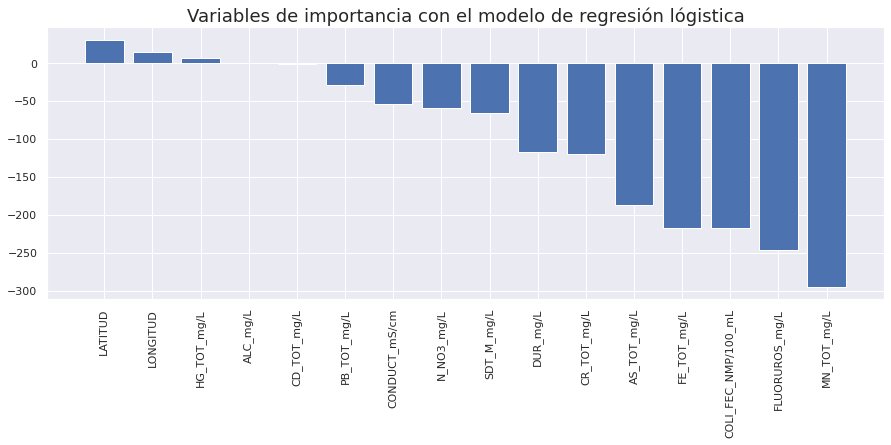

In [17]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Graficando las variables de importancia

sns.set(rc={'figure.figsize':(15,5)})
plt.bar(x=importances['Attribute'], height= round(importances['Importance']*100, 2))
plt.title('Variables de importancia con el modelo de regresión lógistica', size=18)
plt.xticks(rotation='vertical')
plt.show()


---------------- Encontrando las variables de importancia ----------------



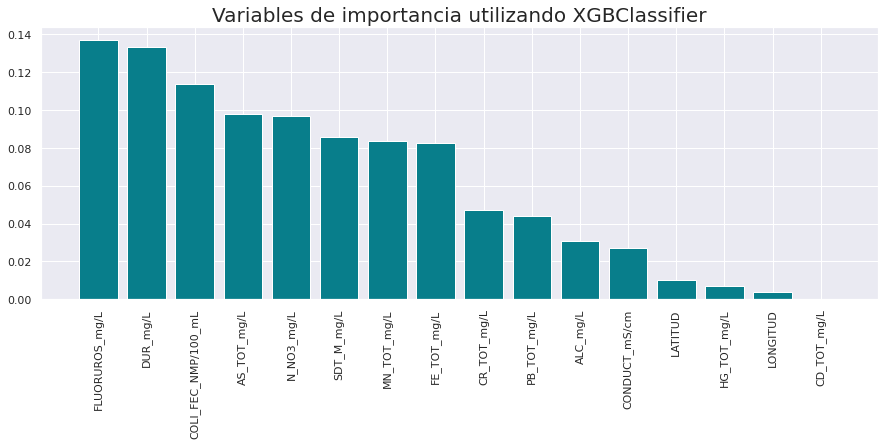


--------------------------------------------------------------------------



In [19]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Variables de importancia utilizando XGBClassifier

from xgboost import XGBClassifier

print('\n---------------- Encontrando las variables de importancia ----------------\n')

model= XGBClassifier()
model.fit(xtv_scaled, ytv)
importances= pd.DataFrame(data={'Attribute': Xtv.columns, 'Importance': model.feature_importances_ })
importances= importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Variables de importancia utilizando XGBClassifier', size=20)
plt.xticks(rotation='vertical')
plt.show()

print('\n--------------------------------------------------------------------------\n')


---

# 4. Análisis de resultados con modelo de Decision Trees y Random Forest
- Realiza análisis de exactitudes (accuracies). A través de métricas de exactitud o classification report de scikitlearn.
- Realiza gráfica de confusion matrix

---

In [57]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Definiendo las métricas: accuracy, precision, recall, f1-score y Gmean

print('\n-------------------------------- Métricas --------------------------------\n')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def exactitud_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  exactitud = (vp + vn) / (vp + vn + fp + fn) 
  return exactitud

def precision_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  precision = vp / (vp + fp) 
  return precision

def recall_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  recall = vp / (vp + fn) 
  return recall

def f1_score_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  f1_score = 2*vp / ((2*vp) + fp +fn)
  return f1_score

def Gmean_(Yreal, Ypred):
  vn, fp, fn, vp = confusion_matrix(Yreal, Ypred).ravel() 
  Gmean = np.sqrt( (vp / (vp + fn)) * vn / (vn + fp)) 
  return Gmean

def conf_mat_(yreal, ypred, colormap_, titulo_):
  cm = confusion_matrix(yreal, ypred)
  print('Matriz de confusión:\n')
  print(cm)
  Visualiza_mapa_de_calor(pd.DataFrame(cm), colormap_, titulo_)

def exactitud_sk_(yreal, ypred):
  from sklearn.metrics import accuracy_score
  exactitud= accuracy_score(yreal, ypred)
  return exactitud

print('\n--------------------------------------------------------------------------\n')



-------------------------------- Métricas --------------------------------


--------------------------------------------------------------------------




----------------------------- Decision tree ------------------------------


-------------------------------- Métricas --------------------------------


	 Exactitud entrenamiento: 0.96 

Matriz de confusión:

[[337   0   0]
 [ 19 184   0]
 [  8   3 292]]


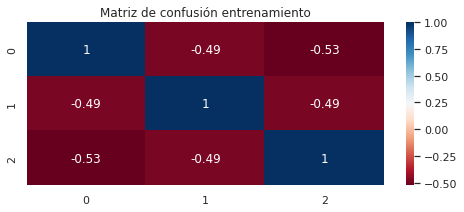

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"



		Exactitud prueba: 0.95
Matriz de confusión:

[[90  0  0]
 [ 4 37  1]
 [ 0  5 74]]


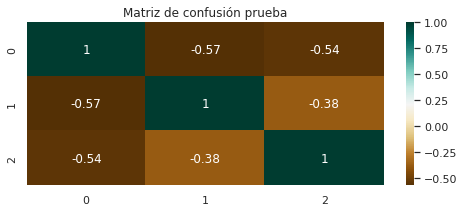


--------------------------------------------------------------------------



In [63]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Modelo decision tree

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz

print('\n----------------------------- Decision tree ------------------------------\n')
max_depth_= 7
random_state_= 42
dec_tree= tree.DecisionTreeClassifier(max_depth= max_depth_, random_state= random_state_, class_weight='balanced')
dec_tree= dec_tree.fit(Xtv, ytv)

#tree= export_graphviz(dec_tree, out_file= None, feature_names= Xtv.columns, class_names= ['Verde','Rojo','Amarllo'], rounded= True, filled= True)
#import pydotplus
#from IPython.display import Image
#graph= pydotplus.graph_from_dot_data(tree)
#graph.write_png('Arbol.png')
#Image(filename= 'Arbol.png')

print('\n-------------------------------- Métricas --------------------------------\n')
sns.set(rc={'figure.figsize':(8,3)})
ytvhat= dec_tree.predict(Xtv)
Exac_ytvhat= round(exactitud_sk_(ytv, ytvhat), 2)
print('\n\t Exactitud entrenamiento:', Exac_ytvhat, '\n')
conf_mat_(ytv, ytvhat, 'RdBu', 'Matriz de confusión entrenamiento')
ytesthat= dec_tree.predict(Xtest)
Exac_ytesthat= round(exactitud_sk_(ytest, ytesthat), 2)
print('\n\t\tExactitud prueba:', Exac_ytesthat)
conf_mat_(ytest, ytesthat, 'BrBG', 'Matriz de confusión prueba')
print('\n--------------------------------------------------------------------------\n')


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Modelo random forest

print('\n--------------------------------- título ---------------------------------\n')
print('\n------------------------- Contando las clases --------------------ll+-----\n')


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 

print('\n--------------------------------- título ---------------------------------\n')
print('\n--------------------------------------------------------------------------\n')


---

# 5. Describe los principales hallazgos del análisis y clasificación de los datos por medio de los modelos de Decision Trees y Random Forest.

---

---

# Conclusiones finales

- d

---

---

# Fin Reto entrega 2

---

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n5- - - - - - - - - - - - - - - - - - - - - \n')

print('\n:',)
print('\n:',)
print('\n:',)